# Logistic Regression From Scratch

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [3]:
# Function for calculating sigmoid  h = 1 / (1 + np.exp(-z))
def sigmoid(z):
    """
    Input:
        z: is a input (can be a scalar or an array)
    Output:
        h: the sigmois of z
    """
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    
    return h
    

In [5]:
# Testing sigmoid function
if (sigmoid(0) == 0.5):
    print('CORRECT!')
else:
    print('Incorrect')
    
if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

CORRECT!
CORRECT!


## gradient descent function

In [85]:
def gradientDescent(x, y, theta, alpha, num_iters):
    """
    Input:
        x: Matrix of features which is (m, n+1)
        y: Corresponding labels of the input matrix x, dimentions (m, 1)
        theta: weight vector of dimention (n+1, 1)
        alpha: Learning rate
    Output:
        j: the final cost
        theta: the final weight vector
    """
    
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1 / m) * ((np.dot(np.transpose(y), np.log(h))) + (np.dot(np.transpose(1-y), np.log(1-h))))

        # update the weights theta
        theta = theta - (alpha/m) * (np.dot(np.transpose(x), (h-y)))
        
    J = float(J)
    return J, theta

In [105]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# print(tmp_X)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)
# print(tmp_Y)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


## Class of Logistic regression

In [332]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss = None
        
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        self.loss = {}
    
        # gradient descent
        for i in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            cost = (-1 / n_samples) * ((np.dot(np.transpose(y), np.log(y_pred))) + (np.dot(np.transpose(1-y), np.log(1-y_pred))))
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y) 
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.loss[i] = cost.item()
            
    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

        return y_predict
        

In [155]:
clf = LogisticRegression(1e-8, 700)
clf.fit(tmp_X, tmp_Y)

In [157]:
print(clf.weights, clf.bias)

[[4.10713203e-07]
 [3.56584607e-04]
 [7.30886599e-05]] 4.1071320297729753e-07


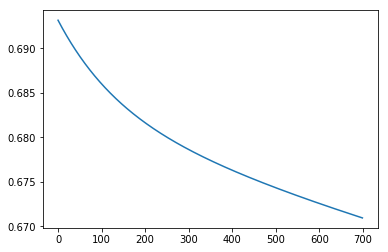

In [153]:
plt.plot(clf.loss.values())
plt.show()

## Fitting model on tweet data

In [161]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

In [209]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

print(len(positive_tweets), len(negative_tweets))

5000 5000


In [210]:
train_pos = positive_tweets[:4000]
train_neg = negative_tweets[:4000]
test_pos = positive_tweets[4000:]
test_neg = negative_tweets[4000:]

X_train = train_pos + train_neg
X_test = test_pos + test_neg

In [211]:
y_train = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
y_test = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

print("X_train shape", len(X_train))
print("X_test shape", len(X_test))

print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape 8000
X_test shape 2000
y_train shape (8000, 1)
y_test shape (2000, 1)


### Utility functions

In [233]:
import re    # Library for regular expressions
import string    # For string operations

from nltk.corpus import stopwords   # module for stopwords
from nltk.stem import PorterStemmer  # Module for stemming
from nltk.tokenize import TweetTokenizer  # Module for tokenizing

def process_tweets(tweet):
    """Process tweet function.
    Input: 
        tweet: a string containing a tweet
    Output:
        tweet_clean: a list of words containing the preprocessed tweeets
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    tweet = re.sub(r'#', '', tweet)

    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    # Tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []

    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
            
    return tweets_clean
        

In [234]:
def build_freqs(tweets, ys):
    """Build frquencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, class) to frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweets(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [235]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweets(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [236]:
# create frequency dictionary
freqs = build_freqs(X_train, y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11339


In [237]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :]= extract_features(X_train[i], freqs)
    
y = y_train

In [238]:
X

array([[1.000e+00, 3.020e+03, 6.100e+01],
       [1.000e+00, 3.573e+03, 4.440e+02],
       [1.000e+00, 3.005e+03, 1.150e+02],
       ...,
       [1.000e+00, 1.440e+02, 7.830e+02],
       [1.000e+00, 2.050e+02, 3.890e+03],
       [1.000e+00, 1.890e+02, 3.974e+03]])

In [334]:
clf = LogisticRegression(1e-8, 700)
clf.fit(X, y)

In [335]:
print(clf.weights, clf.bias)

[[ 2.94994471e-07]
 [ 1.12063800e-03]
 [-9.91934716e-04]] 2.9499447056282754e-07


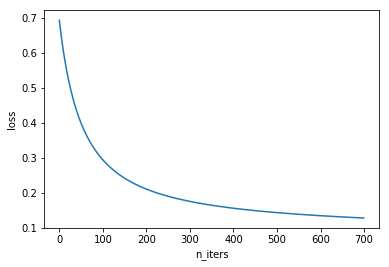

In [350]:
plt.plot(clf.loss.values())
plt.xlabel("n_iters")
plt.ylabel("loss")
plt.show()

In [337]:
x_test = np.zeros((len(X_test), 3))
for i in range(len(x_test)):
    x_test[i, :]= extract_features(X_test[i], freqs)

In [338]:
clf.predict(x_test)

array([[0.96049684],
       [0.96204234],
       [0.76889381],
       ...,
       [0.02513876],
       [0.02571726],
       [0.41646985]])

In [347]:
def test_logistic_regression(x_test, y_test):
    """
    Input: 
        x_test: a list of tweets
        y_test: (m, 1) vector with the corresponding labels for the list of tweets
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in x_test:
        # get the label prediction for the tweet
        y_pred = clf.predict(tweet)
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    
    accuracy = (y_hat==np.squeeze(y_test)).sum()/len(x_test)
    ### END CODE HERE ###
    
    return accuracy

In [348]:
tmp_accuracy = test_logistic_regression(x_test, y_test)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")


Logistic regression model's accuracy = 0.9950


## Error Analysis

In [362]:
# Some error analysis done for you
print('Label Predicted Tweet')
for tweet, x,y in zip(X_test, x_test, y_test):
    y_hat = clf.predict(x)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', tweet)
        print('THE PROCESSED TWEET IS:', process_tweets(tweet))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweets(tweet)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48025584	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48025584	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48025584	b"i'm play brain dot braindot"
THE TWEET IS: @msarosh Uff Itna Miss karhy thy ap :p
THE PROCESSED TWEET IS: ['uff', 'itna', 'miss', 'karhi', 'thi', 'ap', ':p']
1	0.47338444	b'uff itna miss karhi thi ap :p'
THE TWEET IS: @phenomyoutube u probs had more fun with david than me : (
THE PROCESSED TWEET IS: ['u', 'prob', 'fun', 'david']
0	0.50899186	b'u prob fun david'
THE TWEET IS: pats jay : (
THE PROCE

## Predict single tweet

In [361]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweets(my_tweet))
featurized_tweet = extract_features(my_tweet, freqs)
y_hat = clf.predict(featurized_tweet)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.46853064]]
Negative sentiment
